Задание.

Построение модели классификации

    Обзор обучающего датасета
    Обработка выбросов
    Обработка пропусков

## Index

* [Домашняя работа_2](#1302)
* [Домашняя работа_3](#1502)

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
from sklearn.impute import KNNImputer

In [8]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [10]:
import warnings
warnings.filterwarnings('ignore')

Загружаем датасет.
Делаем предварительный обзор дата сета.

In [11]:
df_train = pd.read_csv('/home/mikhail/Рабочий стол/DS_02/course_project/course_project_train.csv')

In [12]:
def view_matrix_in(df_train):
    
    '''показывает пропуски по колонкам сета и общую информацию о сете'''
    for colname in df_train.select_dtypes(include='object').columns:
        print(str(colname) + '\n\n' + str(df_train[colname].value_counts()) + '\n' + '*' * 100 + '\n')
    
    msno.matrix(df_train) 
    display("/usr/local/share/datasets/matrix_sorted.png")
    
    print(df_train.head())
    print(len(df_train) - df_train.count(), df_train.info())

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

'/usr/local/share/datasets/matrix_sorted.png'

  Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN      

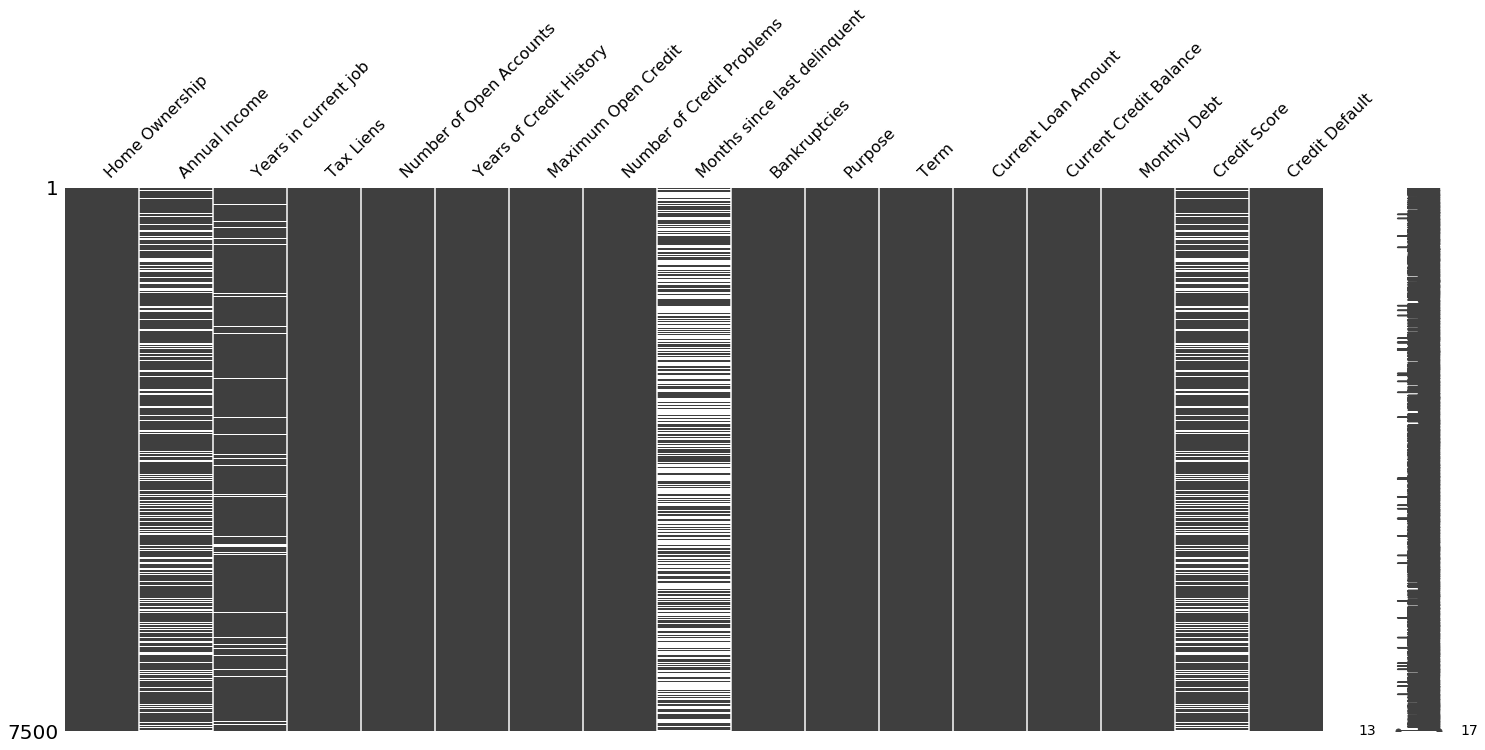

In [13]:
view_matrix_in(df_train)

In [14]:
df_train.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [15]:
df_train.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.943000e+03  7500.000000              7500.000000   
mean    1.366392e+06     0.030133                11.130933   
std     8.453392e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.443410e+05     0.000000                 8.000000   
50%     1.168386e+06     0.000000                10.000000   
75%     1.640137e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000



В колонках:
Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score
есть пропущенные значения.

Обработаем их заполняя либо нулевыми, либо средними значениями.


Строковым значениям присвоим метки



In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
def prepare_label(df_train):
    '''функция преобразующая строковые объекты в метки'''
    
    le = LabelEncoder()

    for col in df_train.columns:       
        if df_train[col].dtypes=='object':
            df_train[col]=le.fit_transform(df_train[col].astype(str))
    return df_train        

In [18]:
prepare_label(df_train) # присваиваем метки для строковых значений

Home Ownership  Annual Income  Years in current job  Tax Liens  \
0                  2       482087.0                    11        0.0   
1                  2      1025487.0                     1        0.0   
2                  1       751412.0                     8        0.0   
3                  2       805068.0                     6        0.0   
4                  3       776264.0                     8        0.0   
...              ...            ...                   ...        ...   
7495               3       402192.0                    10        0.0   
7496               1      1533984.0                     0        0.0   
7497               3      1878910.0                     6        0.0   
7498               1            NaN                    11        0.0   
7499               3            NaN                     4        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
1                        15.0                     15.3            1181730.0   
2                        11.0                     35.0            1182434.0   
3                         8.0                     22.5             147400.0   
4                        13.0                     13.6             385836.0   
...                       ...                      ...                  ...   
7495                      3.0                      8.5             107866.0   
7496                     10.0                     26.5             686312.0   
7497                     12.0                     32.1            1778920.0   
7498                     21.0                     26.5            1141250.0   
7499                      8.0                      9.4             480832.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           1.0                           NaN           1.0   
1                           0.0                           NaN           0.0   
2                           0.0                           NaN           0.0   
3                           1.0                           NaN           1.0   
4                           1.0                           NaN           0.0   
...                         ...                           ...           ...   
7495                        0.0                           NaN           0.0   
7496                        0.0                          43.0           0.0   
7497                        0.0                           NaN           0.0   
7498                        0.0                           NaN           0.0   
7499                        0.0                           NaN           0.0   

      Purpose  Term  Current Loan Amount  Current Credit Balance  \
0           3     1           99999999.0                 47386.0   
1           3     0             264968.0                394972.0   
2           3     1           99999999.0                308389.0   
3           3     1             121396.0                 95855.0   
4           3     1             125840.0                 93309.0   
...       ...   ...                  ...                     ...   
7495        9     1             129360.0                 73492.0   
7496        3     0             444048.0                456399.0   
7497        1     1           99999999.0                477812.0   
7498        3     1             615274.0                476064.0   
7499        3     1              26928.0                288192.0   

      Monthly Debt  Credit Score  Credit Default  
0           7914.0         749.0               0  
1          18373.0         737.0               1  
2          13651.0         742.0               0  
3          11338.0         694.0               0  
4           7180.0         719.0               0  
...            ...           ...             ...  
7495        1900.0         697.0               0  
7496       12783.0

In [19]:
# Subset numeric features: numeric_cols
numeric_cols = df_train.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
df_train_DF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)
df_train_DF, df_train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null float64
Annual Income                   7500 non-null float64
Years in current job            7500 non-null float64
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    7500 non-null float64
Bankruptcies                    7500 non-null float64
Purpose                         7500 non-null float64
Term                            7500 non-null float64
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    7500 non-null float64
Credit Default               

(      Home Ownership  Annual Income  Years in current job  Tax Liens  \
 0                2.0   4.820870e+05                  11.0        0.0   
 1                2.0   1.025487e+06                   1.0        0.0   
 2                1.0   7.514120e+05                   8.0        0.0   
 3                2.0   8.050680e+05                   6.0        0.0   
 4                3.0   7.762640e+05                   8.0        0.0   
 ...              ...            ...                   ...        ...   
 7495             3.0   4.021920e+05                  10.0        0.0   
 7496             1.0   1.533984e+06                   0.0        0.0   
 7497             3.0   1.878910e+06                   6.0        0.0   
 7498             1.0   1.742559e+06                  11.0        0.0   
 7499             3.0   1.402122e+06                   4.0        0.0   
 
       Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
 0                        11.0            

In [20]:
df_train_fin = pd.DataFrame(df_train_DF)
df_train_fin.to_csv('/home/mikhail/Рабочий стол/DS_02/course_project/course_project_train_fin.csv', encoding='utf-8')

In [21]:
def prepare_deal_df(df_train): 
    """функция обрабатывающая пустые ячейки"""
    
        
    df_train['Months since last delinquent'] = df_train['Months since last delinquent'].fillna(0.0)    
    df_train['Bankruptcies'] = df_train['Bankruptcies'].fillna(0.0)
    df_train['Years in current job'] = df_train['Years in current job'].fillna(0.0)
    
    df_train_mean_annual = df_train['Annual Income'].mean()
    df_train['Annual Income'] = df_train['Annual Income'].fillna(df_train_mean_annual)
    
    df_train_mean_cs = df_train['Credit Score'].mean()
    df_train['Credit Score'] = df_train['Credit Score'].fillna(df_train_mean_cs)
    
    return df_train


prepare_knnimputer_df(df_train, IMP_VAL) # обрабатываем пропуски в сете 

In [22]:
df_train_DF.describe() #смотрим конечный результат


Home Ownership  Annual Income  Years in current job    Tax Liens  \
count     7500.000000   7.500000e+03           7500.000000  7500.000000   
mean         1.939067   1.365908e+06              4.018667     0.030133   
std          0.956526   8.442483e+05              3.437658     0.271604   
min          0.000000  -1.255468e+06              0.000000     0.000000   
25%          1.000000   8.366032e+05              1.000000     0.000000   
50%          2.000000   1.204248e+06              3.000000     0.000000   
75%          3.000000   1.699692e+06              7.000000     0.000000   
max          3.000000   1.014934e+07             11.000000     7.000000   

       Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
count              7500.000000              7500.000000         7.500000e+03   
mean                 11.130933                18.317467         9.451537e+05   
std                   4.908924                 7.041946         1.602622e+07   
min                   2.000000                 4.000000         0.000000e+00   
25%                   8.000000                13.500000         2.792295e+05   
50%                  10.000000                17.000000         4.781590e+05   
75%                  14.000000                21.800000         7.935015e+05   
max                  43.000000                57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   7500.000000   7500.000000   
mean                    0.170000                     34.946392      0.117109   
std                     0.498598                     21.821926      0.346920   
min                     0.000000                    -37.919809     -0.115479   
25%                     0.000000                     18.284302      0.000000   
50%                     0.000000                     34.000000      0.000000   
75%                     0.000000                     49.778179      0.000000   
max                     7.000000                    119.237909      4.000000   

           Purpose         Term  Current Loan Amount  Current Credit Balance  \
count  7500.000000  7500.000000         7.500000e+03            7.500000e+03   
mean      3.729333     0.740800         1.187318e+07            2.898332e+05   
std       2.076435     0.438225         3.192612e+07            3.178714e+05   
min       0.000000     0.000000         1.124200e+04            0.000000e+00   
25%       3.000000     0.000000         1.801690e+05            1.142565e+05   
50%       3.000000     1.000000         3.095730e+05            2.093230e+05   
75%       3.000000     1.000000         5.198820e+05            3.604062e+05   
max      14.000000     1.000000         1.000000e+08            6.506797e+06   

        Monthly Debt  Credit Score  Credit Default  
count    7500.000000   7500.000000     7500.000000  
mean    18314.454133   1177.384893        0.281733  
std     11926.764673   1604.508462        0.449874  
min         0.000000  -4297.559885        0.000000  
25%     10067.500000    707.000000        0.000000  
50%     16076.500000    733.000000        0.000000  
75%     23818.000000    747.000000        1.000000  
max    136679.000000   7510.000000        1.000000

In [23]:
# проверяем значения

for colname in df_train_DF.columns:
    print(str(colname) + '\n\n' + str(df_train[colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

1    3637
3    3204
2     647
0      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Annual Income

1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64
****************************************************************************************************

Years in current job

1     2332
2      705
3      620
10     563
5      516
0      504
4      469
6      426
7      396
11     371
8      339
9      259
Name: Years in current job, dtype: int64
****************************************************************************************************

Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
*******************************************

In [24]:
def prepare_missing_n_label(df_train):
    
    ''' сборная функция обрабатывающая пропуски и присваивающая метки'''
    
    prepare_deal_df(df_train)
#     prepare_knnimputer_df_
    prepare_label(df_train)   
    return df_train   
    

In [25]:
df_test= pd.read_csv('/home/mikhail/Рабочий стол/DS_02/course_project/course_project_test.csv')

Обработаем данные в тестовом датасете

In [26]:
prepare_missing_n_label(df_test)
# prepare_knnimputer_df(df_test)

Home Ownership  Annual Income  Years in current job  Tax Liens  \
0                  3   1.366922e+06                     5        0.0   
1                  3   2.318380e+05                     1        0.0   
2                  1   1.152540e+06                     4        0.0   
3                  1   1.220313e+06                     2        0.0   
4                  1   2.340952e+06                     7        0.0   
...              ...            ...                   ...        ...   
2495               1   1.020053e+06                     2        0.0   
2496               1   1.366922e+06                     3        0.0   
2497               1   1.171806e+06                     3        0.0   
2498               3   7.235200e+05                     2        0.0   
2499               3   1.694439e+06                     2        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                         9.0                     12.5             220968.0   
1                         6.0                     32.7              55946.0   
2                        10.0                     13.7             204600.0   
3                        16.0                     17.0             456302.0   
4                        11.0                     23.6            1207272.0   
...                       ...                      ...                  ...   
2495                     14.0                     29.1             559152.0   
2496                     15.0                     17.0            1737780.0   
2497                     48.0                     12.8            1706430.0   
2498                     14.0                     28.8             945780.0   
2499                     12.0                     18.4            1199748.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                           0.0                          70.0           0.0   
1                           0.0                           8.0           0.0   
2                           0.0                           0.0           0.0   
3                           0.0                          70.0           0.0   
4                           0.0                           0.0           0.0   
...                         ...                           ...           ...   
2495                        1.0                          68.0           1.0   
2496                        0.0                          77.0           0.0   
2497                        0.0                           0.0           0.0   
2498                        0.0                           0.0           0.0   
2499                        1.0                          72.0           0.0   

      Purpose  Term  Current Loan Amount  Current Credit Balance  \
0           3     1             162470.0                105906.0   
1           4     1              78298.0                 46037.0   
2           3     1             200178.0                146490.0   
3           3     1             217382.0                213199.0   
4           3     0             777634.0                425391.0   
...       ...   ...                  ...                     ...   
2495        3     1           99999999.0                162735.0   
2496        3     1             468512.0               1439269.0   
2497        3     1             430496.0                676438.0   
2498        3     1             257774.0                391248.0   
2499        3     0             763004.0                559531.0   

      Monthly Debt  Credit Score  
0           6813.0    1234.51686  
1           2318.0     699.00000  
2          18729.0    7260.00000  
3          27559.0     739.00000  
4          42605.0     706.00000  
...            ...           ...  
2495       15046.0     745.00000  
2496       32996.0    1234.51686  
2497       36912.0     695.00000  
2498       13506.0     744.00000  
2499       23440.0    6820.00000  

[2500

In [27]:
def view_matrix_out(df_train, df_test):
    
    '''показывает пропуски по колонкам обработанного сета'''
    
    msno.matrix(df_train) 
    msno.matrix(df_test)
    
    display("/usr/local/share/datasets/matrix_sorted.png")

'/usr/local/share/datasets/matrix_sorted.png'

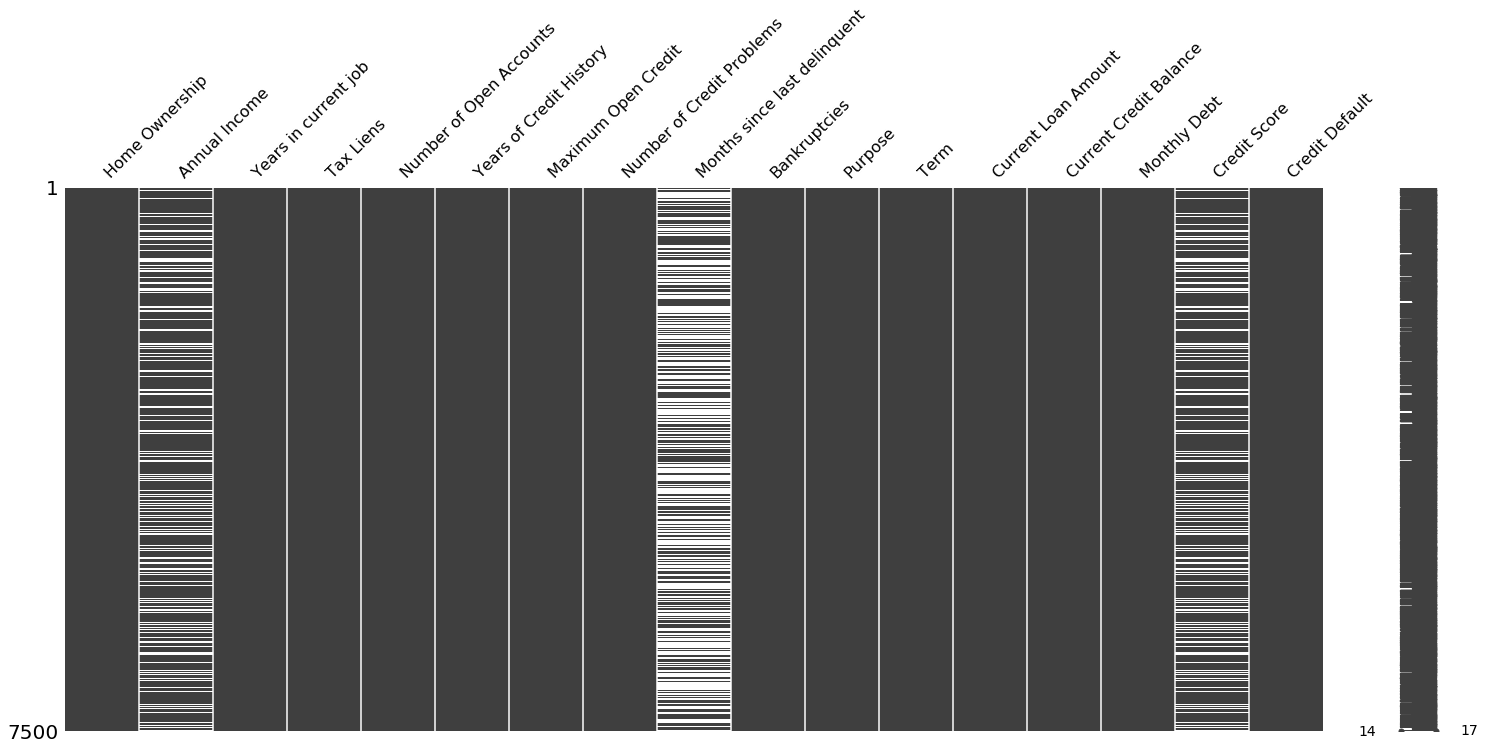

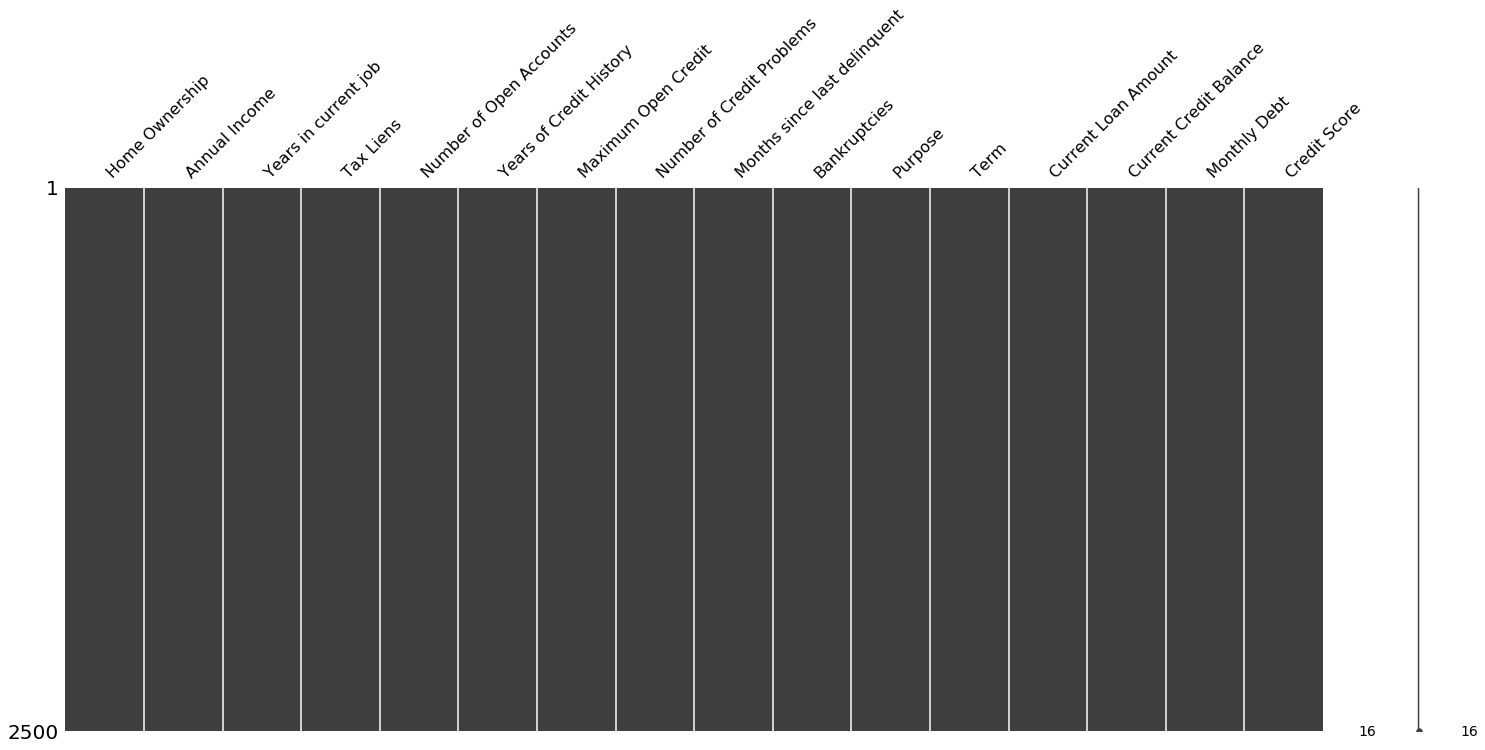

In [28]:
view_matrix_out(df_train, df_test)

Вывод:
    
    Данные приведены к единому типу и не содержат пропусков
    
    Готовы к выбору параметров и построению моделей

## <center>Второй урок<a class="anchor" id="1302"></a><center>





In [29]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:

TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train_DF.columns.drop(TARGET_NAME).tolist()


Посмотрим как выглядит корреляция в данных

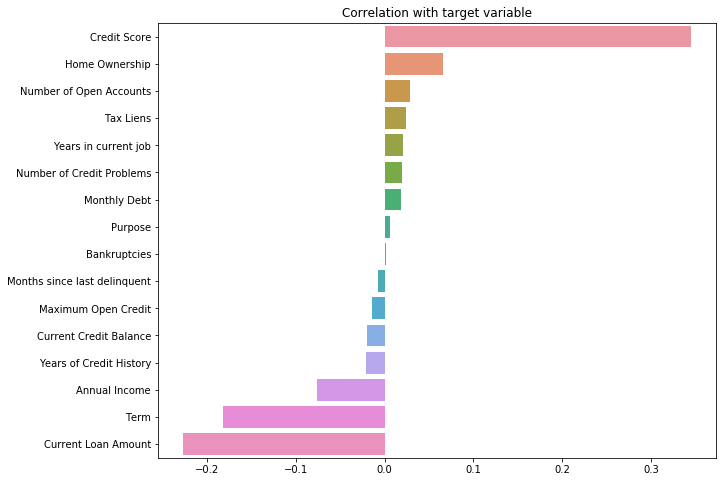

In [31]:
corr_with_target = df_train_DF[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [32]:
correlations_data = df_train_DF.corr()[TARGET_NAME].sort_values()
correlations_data

Current Loan Amount            -0.226522
Term                           -0.181487
Annual Income                  -0.076681
Years of Credit History        -0.020567
Current Credit Balance         -0.019522
Maximum Open Credit            -0.014275
Months since last delinquent   -0.007619
Bankruptcies                    0.001530
Purpose                         0.005841
Monthly Debt                    0.018480
Number of Credit Problems       0.020088
Years in current job            0.020398
Tax Liens                       0.024368
Number of Open Accounts         0.028884
Home Ownership                  0.065620
Credit Score                    0.344621
Credit Default                  1.000000
Name: Credit Default, dtype: float64

In [33]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train_DF[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [34]:
# для дальнейшей работы  урежем сет до 6 признаков:

df_train_select_6 = df_train_DF[['Current Loan Amount',
                              'Term',
                              'Annual Income', 
                              'Home Ownership',
                              'Credit Score',
                              'Credit Default']]

Построим парные графики и посмотрим на характер распределения данных

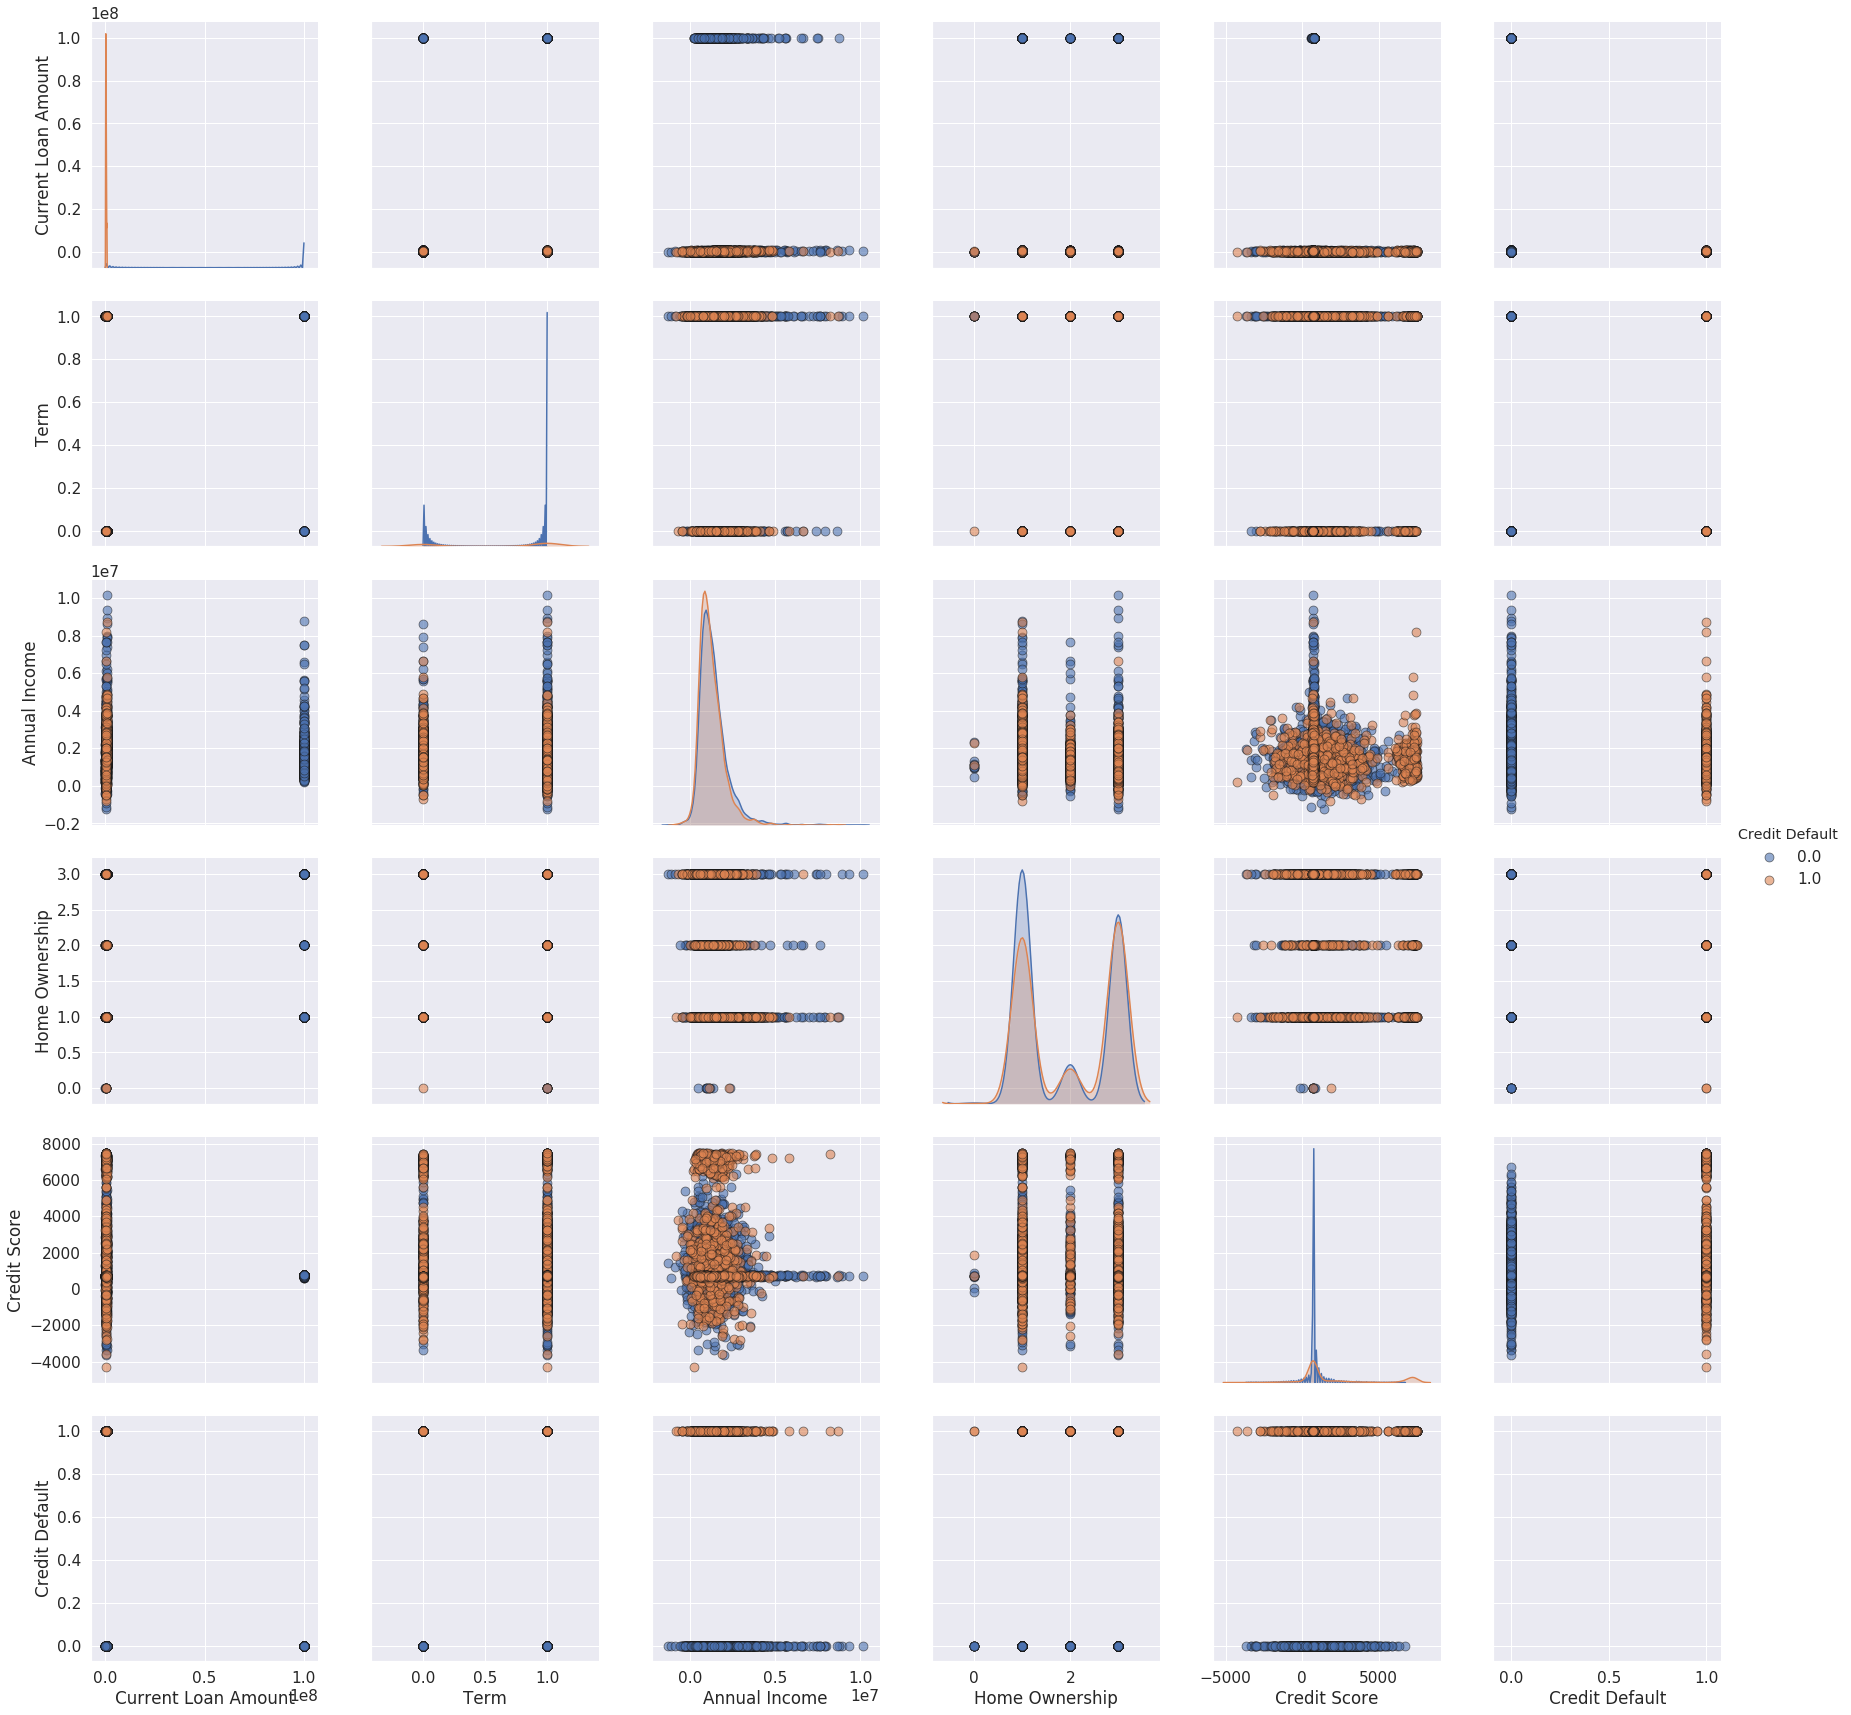

In [35]:
sns.pairplot(df_train_select_6, hue = TARGET_NAME, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

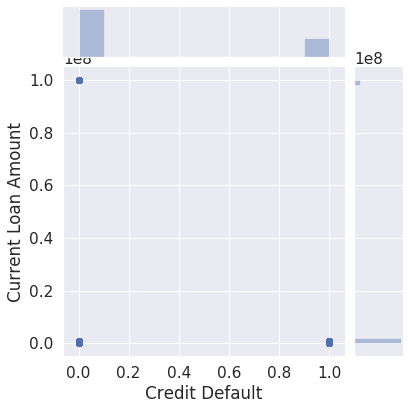

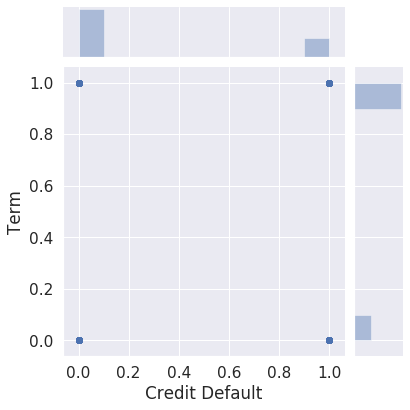

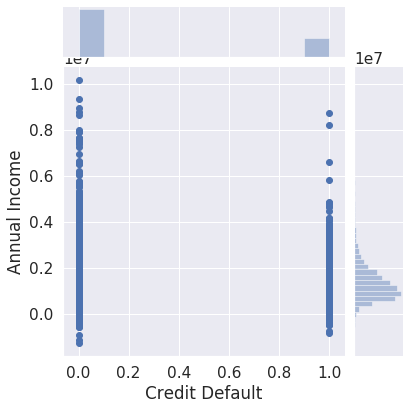

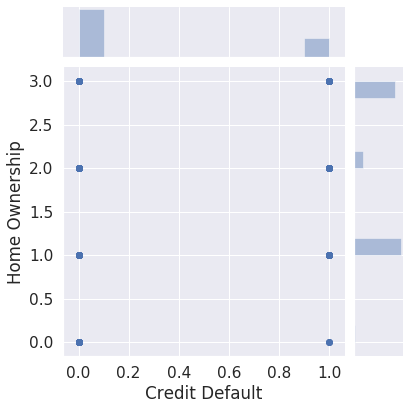

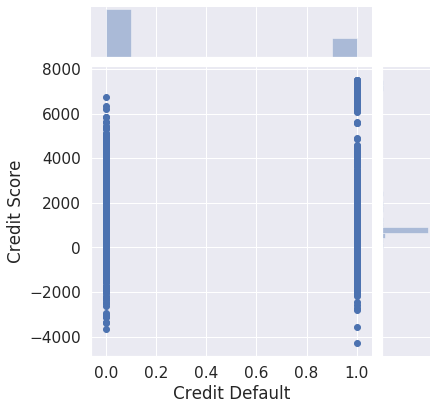

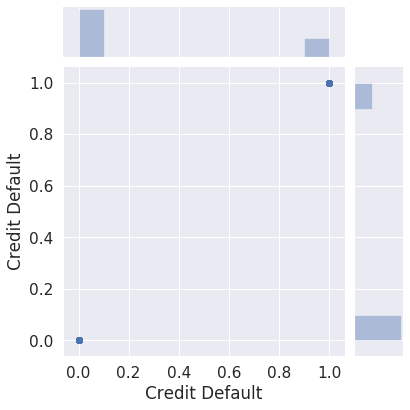

In [36]:
for column in df_train_select_6:
    sns.jointplot(y=column, x= 'Credit Default', data=df_train_select_6)
    plt.show()

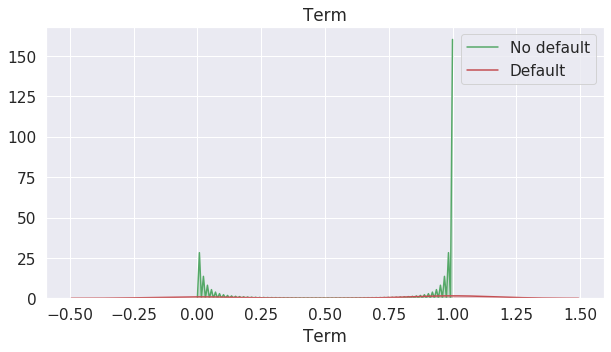

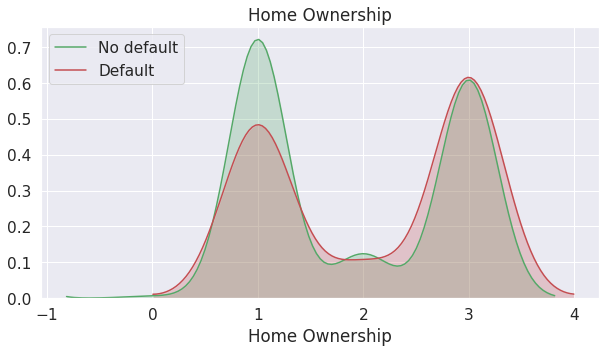

In [37]:
 for column in df_train_select_6:   
    
    limit_bal_with_target_s = df_train[[column, TARGET_NAME]].sample(1000)
    limit_bal_s = limit_bal_with_target_s[column]
    limit_bal_target_0 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 0]
    limit_bal_target_1 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 1]

    plt.figure(figsize=(10, 5))

    sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
    sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')

    plt.xlabel(column)
    plt.title(column)
    plt.show()

Выборка имеет данные с ненормальным, F-распределением.
Для их оценки применим F-критерий


Гипотеза

    Нулевая гипотеза: дисперсии в двух независимых выборках равны
    Альтернативная гипотеза: дисперсии в двух независимых выборках различаются
    Критерий: критерий Фишера. Чем он меньше, тем больше совпадений дисперсий выборок
    

In [38]:
import numpy as np

In [39]:
def fisher_criterion(v1, v2):
    '''Вычисляет критерий Фишера. Но это не точно.'''
    return abs(np.mean(v1) - np.mean(v2)) / (np.var(v1) + np.var(v2))

In [40]:
for column in df_train_select_6:
    ds= fisher_criterion(df_train_select_6[column], df_train_select_6[TARGET_NAME])
    print (column,'___',ds)

Current Loan Amount ___ 1.1650176194665418e-08
Term ___ 1.164035856226142
Annual Income ___ 1.9166323127850436e-06
Home Ownership ___ 1.4834969733797307
Credit Score ___ 0.00045728649716129813
Credit Default ___ 0.0


Вывод:


    Нулевая гипотеза Credit Default/Home Ownership,Credit Default/Term отвергается

## <center>Третий урок<a class="anchor" id="1502"></a><center>

In [41]:
TARGET_NAME = ['Credit Default']
BASE_FEATURE_NAMES = df_train_DF.columns.drop(TARGET_NAME).tolist()
# NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()
# BASE_FEATURE_NAMES
# NEW_FEATURE_NAMES

In [42]:
df_train_DF.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

In [43]:
NUM_FEATURE_NAMES = ['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default']

CAT_FEATURE_NAMES = [
                              'Home Ownership',
                              'Credit Score', 'Monthly Debt']

# SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + NEW_FEATURE_NAMES

In [44]:
df_train_DF[CAT_FEATURE_NAMES].columns

Index(['Home Ownership', 'Credit Score', 'Monthly Debt'], dtype='object')

In [45]:
#pip install xgboost

In [46]:
#pip install lightgbm


In [47]:
# pip install catboost

In [48]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [49]:
from imblearn.over_sampling import SMOTE



In [50]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(df_train_DF)

df_train_final=pd.DataFrame(rescaledX_train, columns=numeric_cols.columns)
df_train_final
# from sklearn.preprocessing import MinMaxScaler

# # Instantiate MinMaxScaler and use it to rescale X_train and X_test
# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledX_train = scaler.fit_transform(X_train)
# rescaledX_test = scaler.fit_transform(X_test)


Home Ownership  Annual Income  Years in current job  Tax Liens  \
0           0.666667       0.152353              1.000000        0.0   
1           0.666667       0.199999              0.090909        0.0   
2           0.333333       0.175968              0.727273        0.0   
3           0.666667       0.180673              0.545455        0.0   
4           1.000000       0.178147              0.727273        0.0   
...              ...            ...                   ...        ...   
7495        1.000000       0.145347              0.909091        0.0   
7496        0.333333       0.244586              0.000000        0.0   
7497        1.000000       0.274829              0.545455        0.0   
7498        0.333333       0.262874              1.000000        0.0   
7499        1.000000       0.233024              0.363636        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                    0.219512                 0.415270             0.000526   
1                    0.317073                 0.210428             0.000906   
2                    0.219512                 0.577281             0.000906   
3                    0.146341                 0.344507             0.000113   
4                    0.268293                 0.178771             0.000296   
...                       ...                      ...                  ...   
7495                 0.024390                 0.083799             0.000083   
7496                 0.195122                 0.418994             0.000526   
7497                 0.243902                 0.523277             0.001363   
7498                 0.463415                 0.418994             0.000875   
7499                 0.146341                 0.100559             0.000369   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                      0.142857                      0.606874      0.271045   
1                      0.000000                      0.190994      0.028060   
2                      0.000000                      0.430216      0.028060   
3                      0.142857                      0.494273      0.271045   
4                      0.142857                      0.135808      0.028060   
...                         ...                           ...           ...   
7495                   0.000000                      0.460656      0.028060   
7496                   0.000000                      0.514896      0.028060   
7497                   0.000000                      0.515834      0.028060   
7498                   0.000000                      0.501017      0.028060   
7499                   0.000000                      0.239337      0.028060   

       Purpose  Term  Current Loan Amount  Current Credit Balance  \
0     0.214286   1.0             1.000000                0.007283   
1     0.214286   0.0             0.002538                0.060701   
2     0.214286   1.0             1.000000                0.047395   
3     0.214286   1.0             0.001102                0.014732   
4     0.214286   1.0             0.001146                0.014340   
...        ...   ...                  ...                     ...   
7495  0.642857   1.0             0.001181                0.011295   
7496  0.214286   0.0             0.004329                0.070142   
7497  0.071429   1.0             1.000000                0.073433   
7498  0.214286   1.0             0.006041                0.073164   
7499  0.214286   1.0             0.000157                0.044291   

      Monthly Debt  Credit Score  Credit Default  
0         0.057902      0.427401             0.0  
1         0.134424      0.426384             1.0  
2         0.099876      0.426808             0.0  
3         0.082953      0.422743             0.0  
4         0.052532      0.424860             0.0  
...            ...           ...             ...  
7495      0.013901      0.422997             0.0  
7496  

In [51]:
# # Subset features
# numeric_cols = df_train_DF.select_dtypes(include=[np.number])
# # categoric_cols = df_train_DF.select_dtypes(include=[object])
# numeric_cols
# Instantiate
scalerSS = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scalerSS.fit_transform(df_train_final)
df_train_final_S= pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)
df_train_final_S

# df_train_final=pd.DataFrame(rescaledX_train, columns=numeric_cols.columns)
# df_train_final
# Concatenate categoric columns to scaled numeric columns
# final_DF = ____.____([____, ____], ____=____)
# print(final_DF.head())


Home Ownership  Annual Income  Years in current job  Tax Liens  \
0           0.063707      -1.046943              2.030975  -0.110953   
1           0.063707      -0.403250             -0.878176  -0.110953   
2          -0.981812      -0.727910              1.158230  -0.110953   
3           0.063707      -0.664351              0.576400  -0.110953   
4           1.109226      -0.698471              1.158230  -0.110953   
...              ...            ...                   ...        ...   
7495        1.109226      -1.141584              1.740060  -0.110953   
7496       -0.981812       0.199097             -1.169091  -0.110953   
7497        1.109226       0.607684              0.576400  -0.110953   
7498       -0.981812       0.446168              2.030975  -0.110953   
7499        1.109226       0.042898             -0.005430  -0.110953   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                   -0.026674                 1.133645            -0.016174   
1                    0.788223                -0.428528             0.014763   
2                   -0.026674                 2.369181             0.014807   
3                   -0.637847                 0.593985            -0.049781   
4                    0.380774                -0.669954            -0.034902   
...                       ...                      ...                  ...   
7495                -1.656468                -1.394234            -0.052248   
7496                -0.230398                 1.162048            -0.016152   
7497                 0.177050                 1.957336             0.052029   
7498                 2.010568                 1.162048             0.012237   
7499                -0.637847                -1.266420            -0.028975   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                      1.664779                      1.031543       2.54511   
1                     -0.340979                     -1.963752      -0.33759   
2                     -0.340979                     -0.240803      -0.33759   
3                      1.664779                      0.220552       2.54511   
4                      1.664779                     -2.361217      -0.33759   
...                         ...                           ...           ...   
7495                  -0.340979                     -0.021564      -0.33759   
7496                  -0.340979                      0.369085      -0.33759   
7497                  -0.340979                      0.375847      -0.33759   
7498                  -0.340979                      0.269130      -0.33759   
7499                  -0.340979                     -1.615575      -0.33759   

       Purpose      Term  Current Loan Amount  Current Credit Balance  \
0    -0.351267  0.591517             2.760520               -0.762772   
1    -0.351267 -1.690569            -0.363620                0.330781   
2    -0.351267  0.591517             2.760520                0.058379   
3    -0.351267  0.591517            -0.368118               -0.610282   
4    -0.351267  0.591517            -0.367978               -0.618292   
...        ...       ...                  ...                     ...   
7495  2.538494  0.591517            -0.367868               -0.680639   
7496 -0.351267 -1.690569            -0.358011                0.524039   
7497 -1.314520  0.591517             2.760520                0.591407   
7498 -0.351267  0.591517            -0.352647                0.585907   
7499 -0.351267  0.591517            -0.371077               -0.005164   

      Monthly Debt  Credit Score  Credit Default  
0        -0.872085     -0.267006       -0.626291  
1         0.004909     -0.274485        1.596702  
2        -0.391034     -0.271369       -0.626291  
3        -0.584980     -0.301287       -0.626291  
4        -0.933631     -0.285705       -0.626291  
...            ...           ...             ...  
7495     

In [52]:
model_lr = LogisticRegression()

In [53]:
>>> from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.over_sampling import RandomOverSampler

In [54]:
X = df_train_final_S[CAT_FEATURE_NAMES]
y = df_train_final_S[TARGET_NAME]

In [55]:
 # doctest: +NORMALIZE_WHITESPACE
X, y = make_classification(n_classes=2, class_sep=2,
                        weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                        n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
# Resampled dataset shape Counter({0: 900, 1: 900})

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


In [56]:
# X = df_train_final[CAT_FEATURE_NAMES]
# y = df_train_final[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, shuffle=True, test_size=0.30, random_state=21)
X, y

NameError: name 'X_sm' is not defined

In [ ]:
sm = SMOTE(random_state = 2)

X_sm, y_sm = sm.fit_sample(X, y.ravel()) 

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

  

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

In [ ]:
model_lr.fit(X_sm, y_sm)

plt.barh(X_train.columns, model_lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [ ]:
# !pip install imblearn

In [ ]:
lr1 = LogisticRegression()

lr1.fit(X_train, y_train)

predictions = lr1.predict(X_test)

  
# печать отчета о классификации

print(classification_report(y_test, predictions)) 

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].values()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [ ]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].values()

In [ ]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(confusion_matrix(y_test_true, y_test_pred))

In [ ]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
model_lgbm.best_score_

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [ ]:
# Import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.03,random_state=123)
gb_model.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)



get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:


# Instantiate, fit, predict
gb_model = GradientBoostingClassifier(n_estimators=50, 
                                      learning_rate=0.1,
                                      random_state=123, 
                                      max_depth=6
                                     )
gb_model.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
# # Print evaluation metrics
# print("Gradient Boosting Accuracy: {}".format(accuracy_score(gb_pred, y_test)))
# print("Confusion matrix:\n {}".format(confusion_matrix(gb_pred, y_test)))
# print("Precision: {}".format(precision_score(gb_pred, y_test)))
# print("Recall: {}".format(recall_score(gb_pred, y_test)))
# print("F1: {}".format(f1_score(gb_pred, y_test)))

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5)

grid_model.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

# # Print evaluation metrics
# Use scaler to rescale X and assign it to rescaledXestimator=logreg, param_grid=param_grid, cv=5
# Use scaler to rescale X and assign it to rescale
# rescaledX = scaler.fit_transform(X)

# # Fit data to grid_model
# grid_model_result = grid_model.fit(rescaledX_train,y)

# # Summarize results
# best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
# print("Best: %f using %s" % (best_score, best_params))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

 #####################Черновик и заготовки ################################


plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current Loan Amount', data=limit_bal_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for LIMIT_BAL')
plt.show()

# Create the pairgrid object
grid = sns.PairGrid(data = df_train_select_6, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Default', size = 36, y = 1.02);

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

g = sns.PairGrid(df,
                 vars=['countFriends', 'countFollowers', 'countOwnerPosts', 'countOwnerReposts','countPhotos', 'sex'],
                 hue="sex", palette="Set2",
                 hue_kws={"marker": ['+', 'o']})

g = g.map_diag(plt.hist, histtype="step", linewidth=2)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()


Разобьем для подробного анализа на датафрейм на несколько частей
#Делить будем по 'countFriends'
df_low_head= df.loc[(df['countFriends']<500)]

df_low= df.loc[(df['countFriends']>501)&(df['countFriends']<1799)]

df_med= df.loc[(df['countFriends']>1800) & (df['countFriends']<4999)]

df_hight = df.loc[(df['countFriends']>5000)]

df_low_head.info(),df_low.info(),df_med.info(), df_hight.info()

print(p9.ggplot(df_low_head)+p9.aes(x='countFriends',fill='countFollowers')+ p9.geom_density(alpha=0.5))
print(p9.ggplot(df_low)+p9.aes(x='countFriends',fill='countFollowers')+ p9.geom_density(alpha=0.5))
print(p9.ggplot(df_med)+p9.aes(x='countFriends',fill='countFollowers')+ p9.geom_density(alpha=0.5))
print(p9.ggplot(df_hight)+p9.aes(x='countFriends',fill='countFollowers')+ p9.geom_density(alpha=0.5))

In [ ]:
df_train_select_6.columns,df_train_select_6.info()

In [ ]:
view_matrix_out(df_train_select_6, df_train_select_10)

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(df_train_select_6['Credit Score'], df_train_select_6['Credit Default'])
oddsratio, pvalue

In [ ]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt.fit_transform(df_train_select_6)
df_train_select_6

for column in df_train_select_6:
    sns.jointplot(y=column, x= 'Credit Default', data=df_train_select_6)
    plt.show()



min_lm = ols('JPERF ~ TEST', data=jobtest_table).fit()
print(min_lm.summary())



moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
data = moore.data
data = data.rename(columns={"partner.status" :
                            "partner_status"}) # make name pythonic
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
print(table)

from __future__ import print_function
from statsmodels.compat import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

kidney_lm = ols('np.log(Days+1) ~ C(Duration) * C(Weight)', data=).fit()

table10 = anova_lm(kidney_lm)

print(anova_lm(ols('np.log(Days+1) ~ C(Duration) + C(Weight)',
                data=kt).fit(), kidney_lm))
print(anova_lm(ols('np.log(Days+1) ~ C(Duration)', data=kt).fit(),
               ols('np.log(Days+1) ~ C(Duration) + C(Weight, Sum)',
                   data=kt).fit()))
print(anova_lm(ols('np.log(Days+1) ~ C(Weight)', data=kt).fit(),
               ols('np.log(Days+1) ~ C(Duration) + C(Weight, Sum)',
                   data=kt).fit()))


from statsmodels.stats.api import anova_lm

table1 = anova_lm(lm, interX_lm)
print(table1)

interM_lm = ols("S ~ X + C(E)*C(M)", data=salary_table).fit()
print(interM_lm.summary())

table2 = anova_lm(lm, interM_lm)
print(table2)


# Выполним двустороннюю ANOVA, чтобы проверить, оказывает ли , 
# количество постов, количество репостов 
# или взаимодействие между числом фолловеров и числом фотографий 
# существенное влияние на количество друзей.

# df_low_head, df_low, df_med, df_hight

model_1 = sm.api.formula.ols('Credit Default ~ C(Home Ownership) + C(Annual Income)', data = df_train_select_6).fit()
# model_2 = sm.api.formula.ols('countFriends ~ countOwnerPosts + countOwnerReposts + countFollowers:countPhotos', 
#                              data = df_med).fit()
# model_3 = sm.api.formula.ols('countFriends ~ countOwnerPosts + countOwnerReposts + countFollowers:countPhotos', 
#                              data = df_hight).fit()

# Выполним двустороннюю ANOVA, чтобы проверить, оказывает ли , 
# количество количество фотографий, количество репостов 
# или взаимодействие между числом фолловеров и полом
# существенное влияние на количество друзей

# model_4 = sm.api.formula.ols('countFriends ~ countPhotos + countOwnerReposts + countFollowers:sex', 
#                              data = df_low_head).fit()
# model_5 = sm.api.formula.ols('countFriends ~ countPhotos + countOwnerReposts + countFollowers:sex', 
#                              data = df_med).fit()
# model_6 = sm.api.formula.ols('countFriends ~ countPhotos + countOwnerReposts + countFollowers:sex', 
#                              data = df_hight).fit()
# Extract our table
aov_table_1 = sm.api.stats.anova_lm(model_1, typ=2)
# aov_table_2 = sm.api.stats.anova_lm(model_2, typ=2)
# aov_table_3 = sm.api.stats.anova_lm(model_3, typ=2)
# aov_table_4 = sm.api.stats.anova_lm(model_4, typ=2)
# aov_table_5 = sm.api.stats.anova_lm(model_5, typ=2)
# aov_table_6 = sm.api.stats.anova_lm(model_6, typ=2)
# Print the table
print('df_low_head_Photo')
print(aov_table_1)
print()
# print('df_med_Photo')
# print(aov_table_2)
# print()
# print('df_hight_Photo')
# print(aov_table_3)
# print()
# print('df_low_head_Gender')
# print(aov_table_4)
# print()
# print('df_med_Gender')
# print(aov_table_5)
# print()
# print('df_hight_Gender')
# print(aov_table_6)